In [178]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
#pip install wordcloud



In [179]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [180]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [181]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [182]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3578,ham,Multiply the numbers independently and count d...,NaN,NaN,NaN
3788,ham,Are you sure you don't mean \get here,"we made you hold all the weed\""""",NaN,NaN
5009,ham,"By the way, 'rencontre' is to meet again. Moun...",NaN,NaN,NaN
4564,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
1378,ham,"Ya tel, wats ur problem..",NaN,NaN,NaN


##1.Data Cleanimg

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [190]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [191]:
df.sample(5)

,v1,v2
3982,ham,Nationwide auto centre (or something like that...
890,ham,Why do you ask princess?
2210,ham,Just wanted to say holy shit you guys weren't ...
333,ham,Any chance you might have had with me evaporat...
2732,ham,How dare you stupid. I wont tell anything to y...


In [192]:
#ranaming the colums

df.rename(columns={'v1' : 'target', 'v2' : 'textData'},inplace= True)

In [195]:
df.sample(3)

,target,textData
2865,ham,Smith waste da.i wanna gayle.
100,ham,Okay name ur price as long as its legal! Wen c...
5201,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...


In [197]:
# here we encode the target column by using label encoder.

encoder = LabelEncoder()

In [200]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [201]:
df['target'] = encoder.fit_transform(df['target'])

In [203]:
#for referencing data/knowing weather its work or not.
df.head()

,target,textData
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [204]:
# checking if any missing values exist in this data
df.isnull().sum()

target      0
textData    0
dtype: int64

In [206]:
#there is no null values in this columns 

#check for duplicate values

df.duplicated().sum()


np.int64(403)

In [207]:
# there are 403 duplicated data

#for removing duplicates
df = df.drop_duplicates(keep='first')

In [208]:
df.duplicated().sum()

np.int64(0)

In [209]:
df.shape

(5169, 2)

2.Exploratory Data analysis


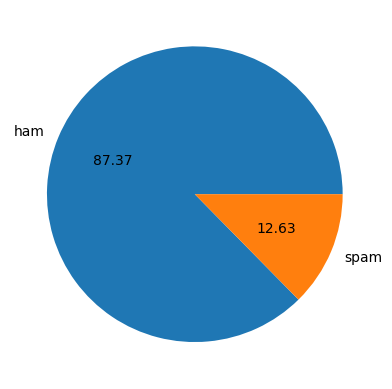

In [210]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [211]:
#dependencies download from nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
# counting number of columns 
df['num_chartrs']= df['textData'].apply(len)

C:\Users\prabh\AppData\Local\Temp\ipykernel_13288\3719565711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chartrs']= df['textData'].apply(len)


In [213]:
df.head()

,target,textData,num_chartrs
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [214]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [215]:
# for knowing number of words
df['num_words'] = df['textData'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\prabh\AppData\Local\Temp\ipykernel_13288\2244225072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['textData'].apply(lambda x:len(nltk.word_tokenize(x)))


In [216]:
df.head()

,target,textData,num_chartrs,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [217]:
df['num_sentences'] = df['textData'].apply(lambda x:len(nltk.sent_tokenize(x))) # this will tokenize the sentences.

C:\Users\prabh\AppData\Local\Temp\ipykernel_13288\1264976341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['textData'].apply(lambda x:len(nltk.sent_tokenize(x))) # this will tokenize the sentences.


In [218]:
df.head()

,target,textData,num_chartrs,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [219]:
# for knowing what is what on data (means , max and min values)

df[['num_chartrs','num_words','num_sentences']].describe()

,num_chartrs,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_chartrs', ylabel='Count'>

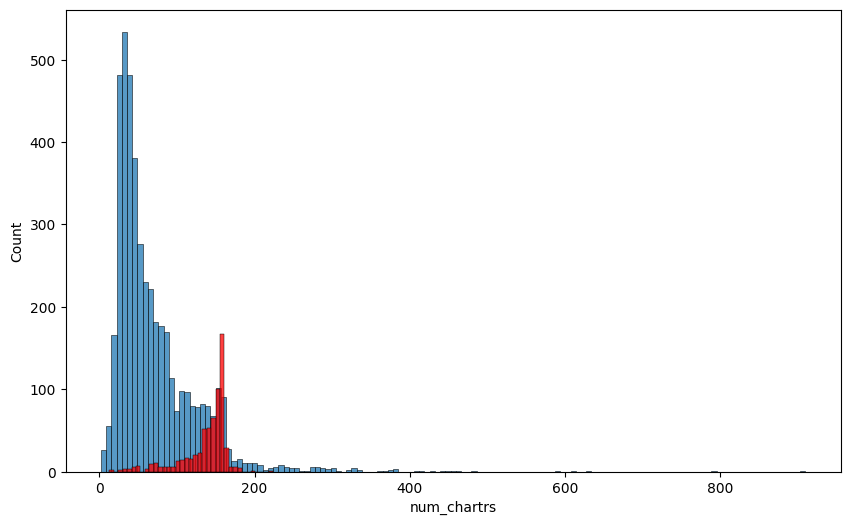

In [220]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_chartrs'])
sns.histplot(df[df['target'] == 1]['num_chartrs'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

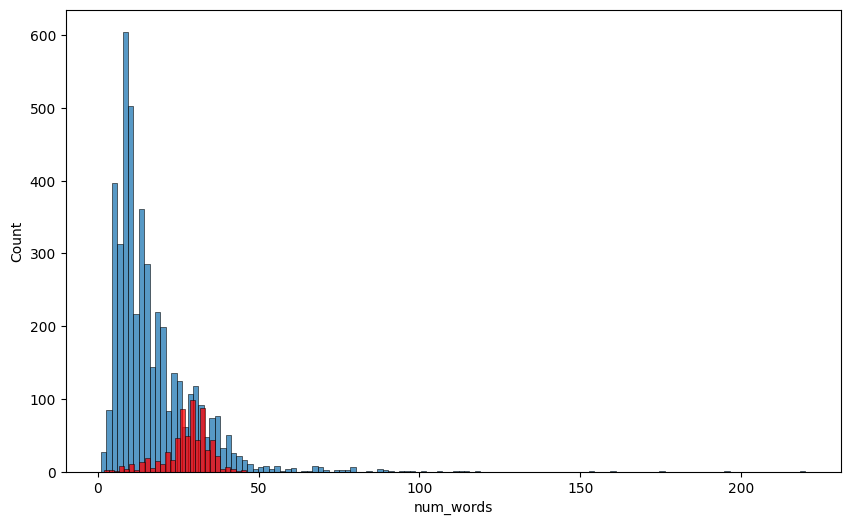

In [221]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

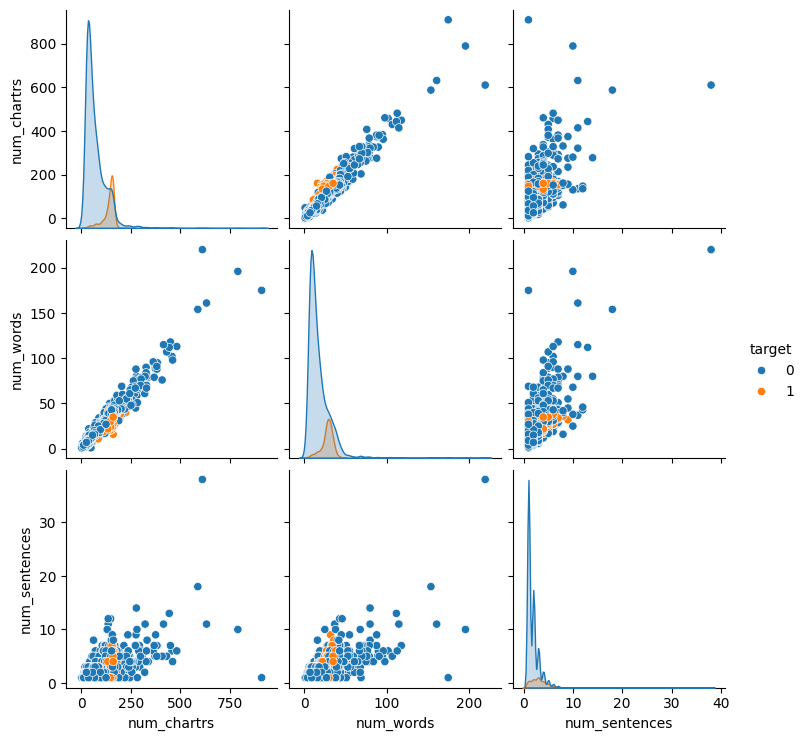

In [222]:
sns.pairplot(df,hue='target')

3# .Data Praprocessing 
Lowercase,
Tokenization,
Removing special characters,
Removing stopwords and panctuations ,
Stemming

In [223]:
# function for data processing

def transform_text(text):
    text = text.lower()
    #for tokenization
    text = nltk.word_tokenize(text)
    #for removing d]special characters
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    # for removing Stopwords and panctuations we run below code.
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)

    # Now for stemming the data like loving to love just like v1 form

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return  " ".join(y)

In [226]:
transform_text('Hi I am Iron Man % 20 Dinesh playing healing???')

'hi iron man 20 dinesh play heal'

In [227]:
# Now we want to apply this for all text emails so.. we apply this function to all
df['transformed_text'] = df['textData'].apply(transform_text)

C:\Users\prabh\AppData\Local\Temp\ipykernel_13288\2059655501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['textData'].apply(transform_text)


In [228]:
df.head()

,target,textData,num_chartrs,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [176]:
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 500 , min_font_size=10,background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target' ]==1]['transformed_text'].str.cat(sep=" "))
# here we created a wordCloud object so that it will store all repeated words in spam mails.


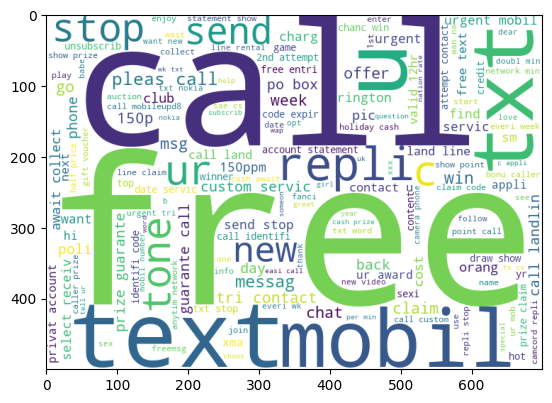

In [155]:
plt.imshow(spam_wc) # this will have all the repeated data .

In [156]:
ham_wc = wc.generate(df[df['target' ]==0]['transformed_text'].str.cat(sep=" "))

# this will store ham messages.

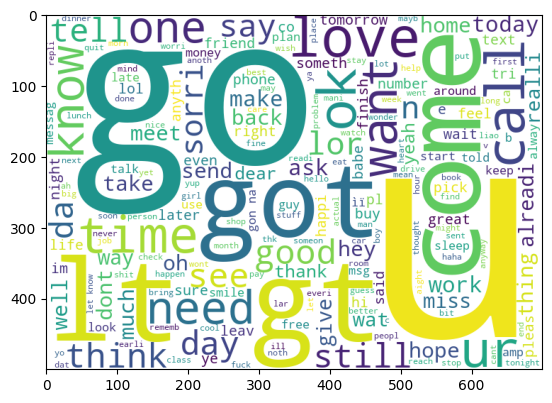

In [157]:
plt.imshow(ham_wc)

In [158]:
# now we take top 45 words 
spam_toplist = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_toplist.append(word)

In [159]:
len(spam_toplist)

9939

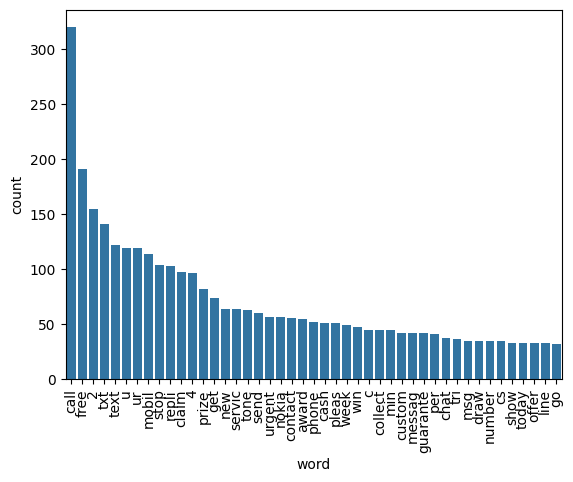

In [160]:
from collections import Counter

df = pd.DataFrame(Counter(spam_toplist).most_common(45), columns=['word', 'count'])
sns.barplot(x=df['word'], y=df['count'])

plt.xticks(rotation ='vertical')
plt.show()
## add this to a data frame

In [161]:
df.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [162]:
df.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [163]:
#text vectorization
#using bag of words


4.Model Building
navie based algorithm


In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=3000)

In [346]:
print(df.columns)

Index(['target', 'textData', 'num_chartrs', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [347]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [348]:
X.shape

(5169, 3000)

In [349]:
Y = df['target'].values

In [332]:
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [352]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [353]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [354]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
# print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

[[790 106]
 [ 24 114]]
0.5181818181818182


In [355]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [356]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf and mnb will give better precision..

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [299]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [301]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [302]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [304]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [305]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307


In [307]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [308]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584
6,AdaBoost,0.921663,0.820225


Based on above Accuracy and Precision scores we will take NB as best suited algorithm..
pricision >> Accuracy (so we took navie bayes)

In [357]:
#  now taking as files to do a project

import pickle   # for serializing data
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))